In [ ]:

random number p between 0 and 4


if p <1: # 0<p<1
    go right
else if p <2: # 1<p<2
    go left
else if p <3: # 2<p<3
    go up
else: # 3<p<4
    go down
    
    



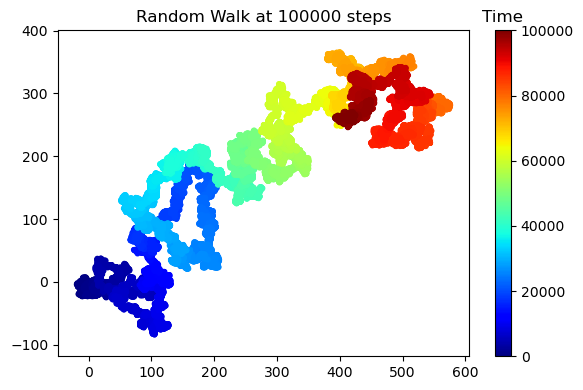

In [37]:
import numpy as np
import matplotlib.pyplot as plt

n_step = 100000
time_array = range(0,n_step)  
x_array = np.zeros(n_step) 
y_array = np.zeros(n_step) 
random_array = np.random.uniform(0,4,n_step)

for t in time_array:
    #print (t)
    p = random_array[t]
    if p < 1: #right
        x_array[t] = x_array[t-1] + 1
        y_array[t] = y_array[t-1] 
    elif p<2: #left
        x_array[t] = x_array[t-1] - 1
        y_array[t] = y_array[t-1] 
    elif p<3: #up
        x_array[t] = x_array[t-1] 
        y_array[t] = y_array[t-1] + 1  
    else: # down
        x_array[t] = x_array[t-1] 
        y_array[t] = y_array[t-1] - 1  
        
    



fig = plt.figure( dpi = 100 ) # set figure resolution, dots per inch
fig.set_size_inches(6,4)
plt.scatter(x_array, y_array, s = 10, c=time_array,cmap='jet')
plt.title("Random Walk at " + str(n_step) + " steps")
plt.clim(0,n_step)
clb = plt.colorbar()
clb.ax.set_title('Time')
plt.axis("equal")
plt.tight_layout()

#plt.xlim(-100,100)
#plt.ylim(-100,100)


In [38]:
dis_array = (x_array**2. + y_array**2.)**0.5

print (dis_array)

[  1.           1.41421356   2.23606798 ... 498.83865127 497.99297184
 497.14786533]


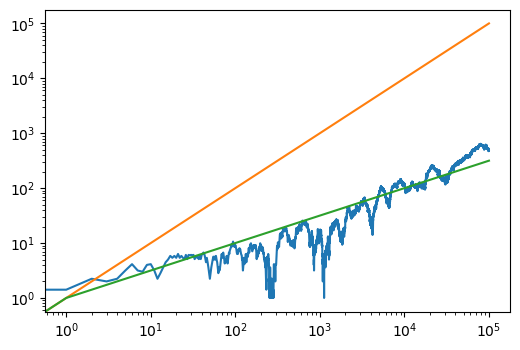

In [39]:
fig = plt.figure( dpi = 100 ) # set figure resolution, dots per inch
fig.set_size_inches(6,4)
plt.loglog(time_array, dis_array)
dis_linear =  time_array
plt.loglog(time_array, dis_linear)
dis_rw_theory = (np.array(time_array))**0.5
plt.loglog(time_array, dis_rw_theory)




In [49]:
from random import choice
my_set = ['apple','banana','egg']
for i in range(10):
    ans = choice(my_set)
    print (ans)


egg
banana
egg
apple
egg
egg
apple
egg
egg
apple


In [42]:
n_part = 10 # Number of particles to aggregate
side = 11 #
steps = [(1,0),(-1,0),(0,1),(0,-1)] # right, left, up, down
DLA_domain = np.zeros((side, side))
DLA_domain[side//2][side//2] = 1 # place a seed at center 

for ipart in range(n_part):
    # Start a random walker at origin
    x,y = 0,0
    # perform the random walk until particle aggregates
    dla_swtich = True # True: continue dla process, False: stop
    while dla_swtich: # while condition.
        dx,dy = choice(steps)
        x = x + dx
        y = y + dy
        # Enforce periodic boundaries
        if x < 0: x = side - 1 #left wall
        if y < 0: y = side - 1 # bottom wall
        if x == side: x = 0 # right wall
        if y == side: y = 0 # top wall
        #neighbors
        if DLA_domain[x+1-side][y] ==1 or 
        if DLA_domain[x-1+side][y] == 1 or
        if DLA_domain[x][y+1] == 1 or
        if DLA_domain[x][y-1] == 1:
        DLA_domain[x][y] = 1
            
            





5

In [43]:
DLA_domain

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

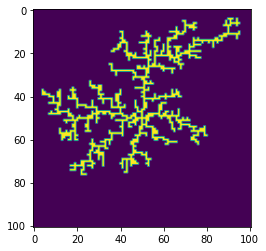

In [52]:
import numpy as np
import matplotlib.pyplot as plt
n_part = 1000
side= 101 # Should be an odd number
steps = [(1,0),(-1,0),(0,1),(0,-1)]
DLA_domain = np.zeros((side, side))
DLA_domain[side//2][side//2] = 1 # place a seed at center 
for ipart in range(n_part):
    # Start a random walker at origin
    x,y = 0,0
    # perform the random walk until particle aggregates
    dla_swtich = True # True: continue dla process, False: stop
    while dla_swtich: # while condition.
        DLA_domain[x][y] = 0 #Remove particle from current spot
        #=====Randomly move particle
        sx,sy = choice(steps)
        x += sx
        y += sy
        # Enforce periodic boundaries
        if x < 0: x = side - 1 #left wall
        if y < 0: y = side - 1 # bottom wall
        if x == side: x = 0 # right wall
        if y == side: y = 0 # top wall
        DLA_domain[x][y] = 1 #Put particle in new location
        # The walker stops when seeing a neighbor
        if (DLA_domain[(x+1)%side][y]+DLA_domain[x][(y+1)%side]
            + DLA_domain[(x+side-1)%side][y]+DLA_domain[x][(y+side-1)%side])>0:
            dla_swtich = False #The walker stops when seeing a neighbor 
plt.imshow(DLA_domain)
#plt.savefig('Unit3.11_DLA.png')

In [54]:
import random
groups = ['A','B','C','D','E','F','G']
#print (groups)
random.shuffle(groups)
print (groups)



['A', 'G', 'B', 'D', 'E', 'F', 'C']
